# EDA PART


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

csv_path = Path.home() / "Documents" / "data1030-fall2025" / "data" / "midterm_pre.csv" 
df = pd.read_csv(csv_path)
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [2]:
print(df.shape)        
print(df.columns)
print(df.isna().sum())

(43824, 13)
Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')
No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64


Time series (line) — PM2.5 over time (daily or weekly aggregate)

Text(0, 0.5, 'pm2.5')

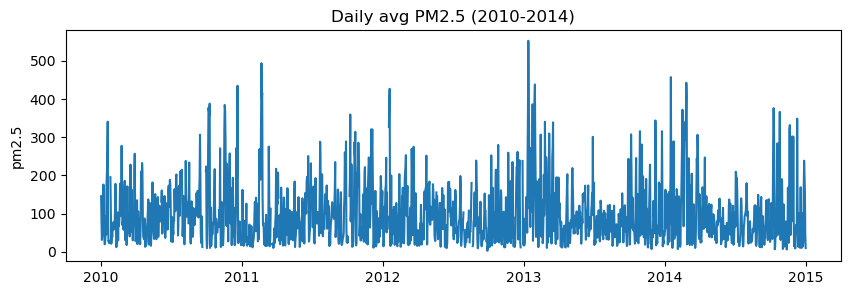

In [ ]:
df['datetime'] = pd.to_datetime(df[['year','month','day','hour']])
ts = df.set_index('datetime')['pm2.5'].resample('D').mean()
plt.figure(figsize=(10,3))
plt.plot(ts)
plt.title('Daily avg PM2.5 (2010-2014)')
plt.ylabel('pm2.5')

Histogram / density of target (pm2.5)

Text(0.5, 1.0, 'Feature correlation')

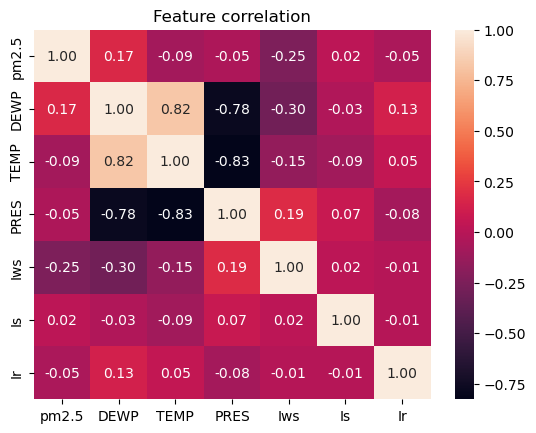

In [ ]:
num = df[['pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir']].copy()
sns.heatmap(num.corr(), annot=True, fmt='.2f')
plt.title('Feature correlation')

Heatmap / correlation matrix for numeric features

([<matplotlib.axis.YTick at 0x158092f60>,
 [Text(0, 0, 'pm2.5'),
  Text(0, 1, 'DEWP'),
  Text(0, 2, 'TEMP'),
  Text(0, 3, 'PRES'),
  Text(0, 4, 'Iws'),
  Text(0, 5, 'Is'),
  Text(0, 6, 'Ir')])

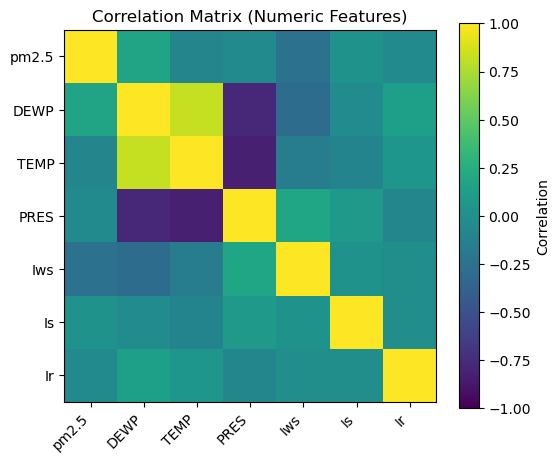

In [21]:
# 5) Correlation heatmap (numeric)
num_cols = ['pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir']
corr = df[num_cols].dropna().corr()
plt.figure(figsize=(6,5)); im = plt.imshow(corr.values, origin='upper', vmin=-1, vmax=1)
plt.colorbar(im, label='Correlation'); plt.title('Correlation Matrix (Numeric Features)')
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha='right'); plt.yticks(range(len(num_cols)), num_cols)


Boxplots by month/hour to show seasonality/diurnal patterns

Text(0.5, 1.0, 'Monthly pm2.5 distribution')

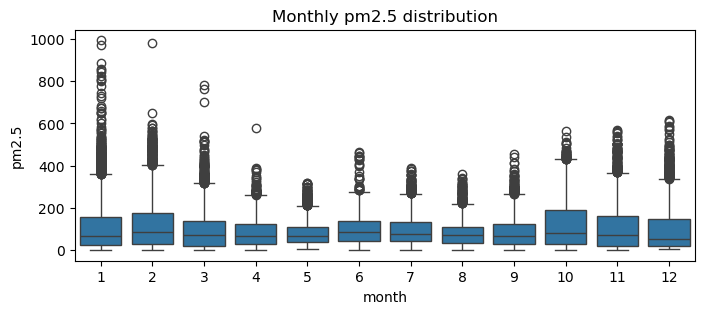

In [ ]:
df['month'] = df['month'].astype(int)
plt.figure(figsize=(8,3))
sns.boxplot(x='month', y='pm2.5', data=df)
plt.title('Monthly pm2.5 distribution')

pandas plottig autocorrelation_plot  ///////   different features to PM2.5

Missingness map (matrix) — show fraction of missing values:

<Axes: >

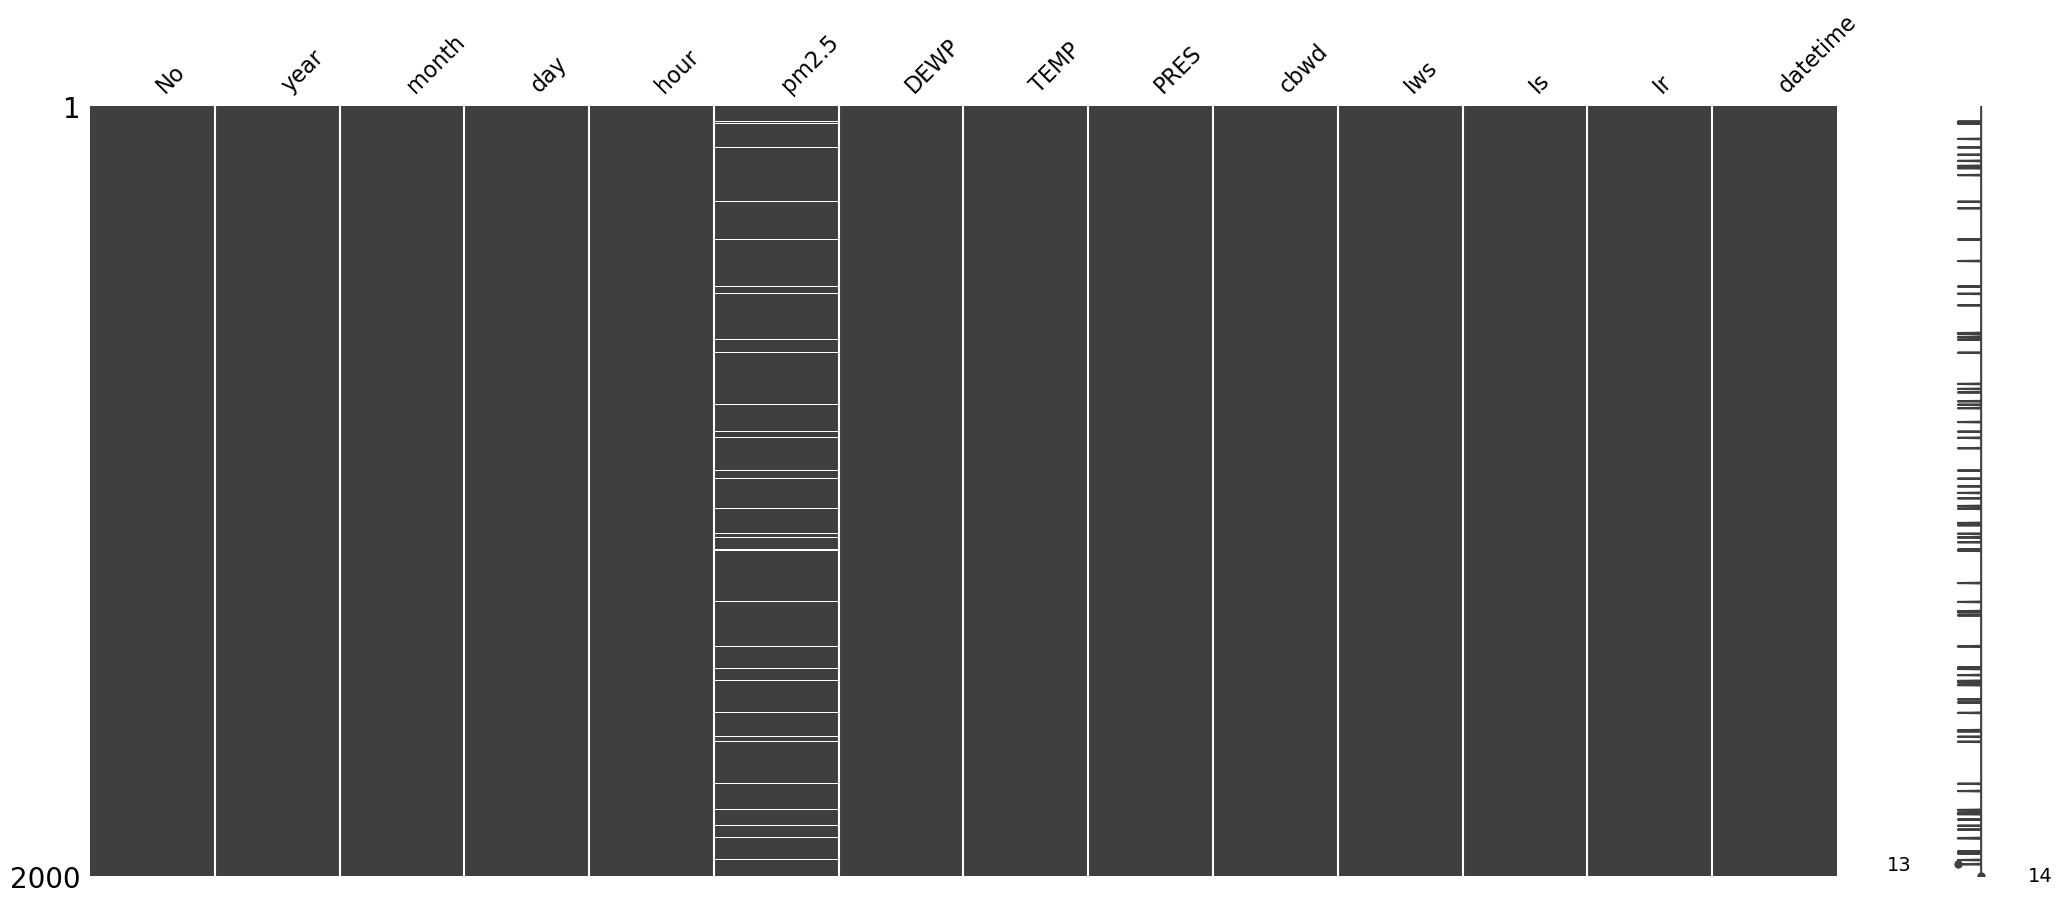

In [9]:
import missingno as msno
msno.matrix(df.sample(2000))

# Splitting and Preprocessing

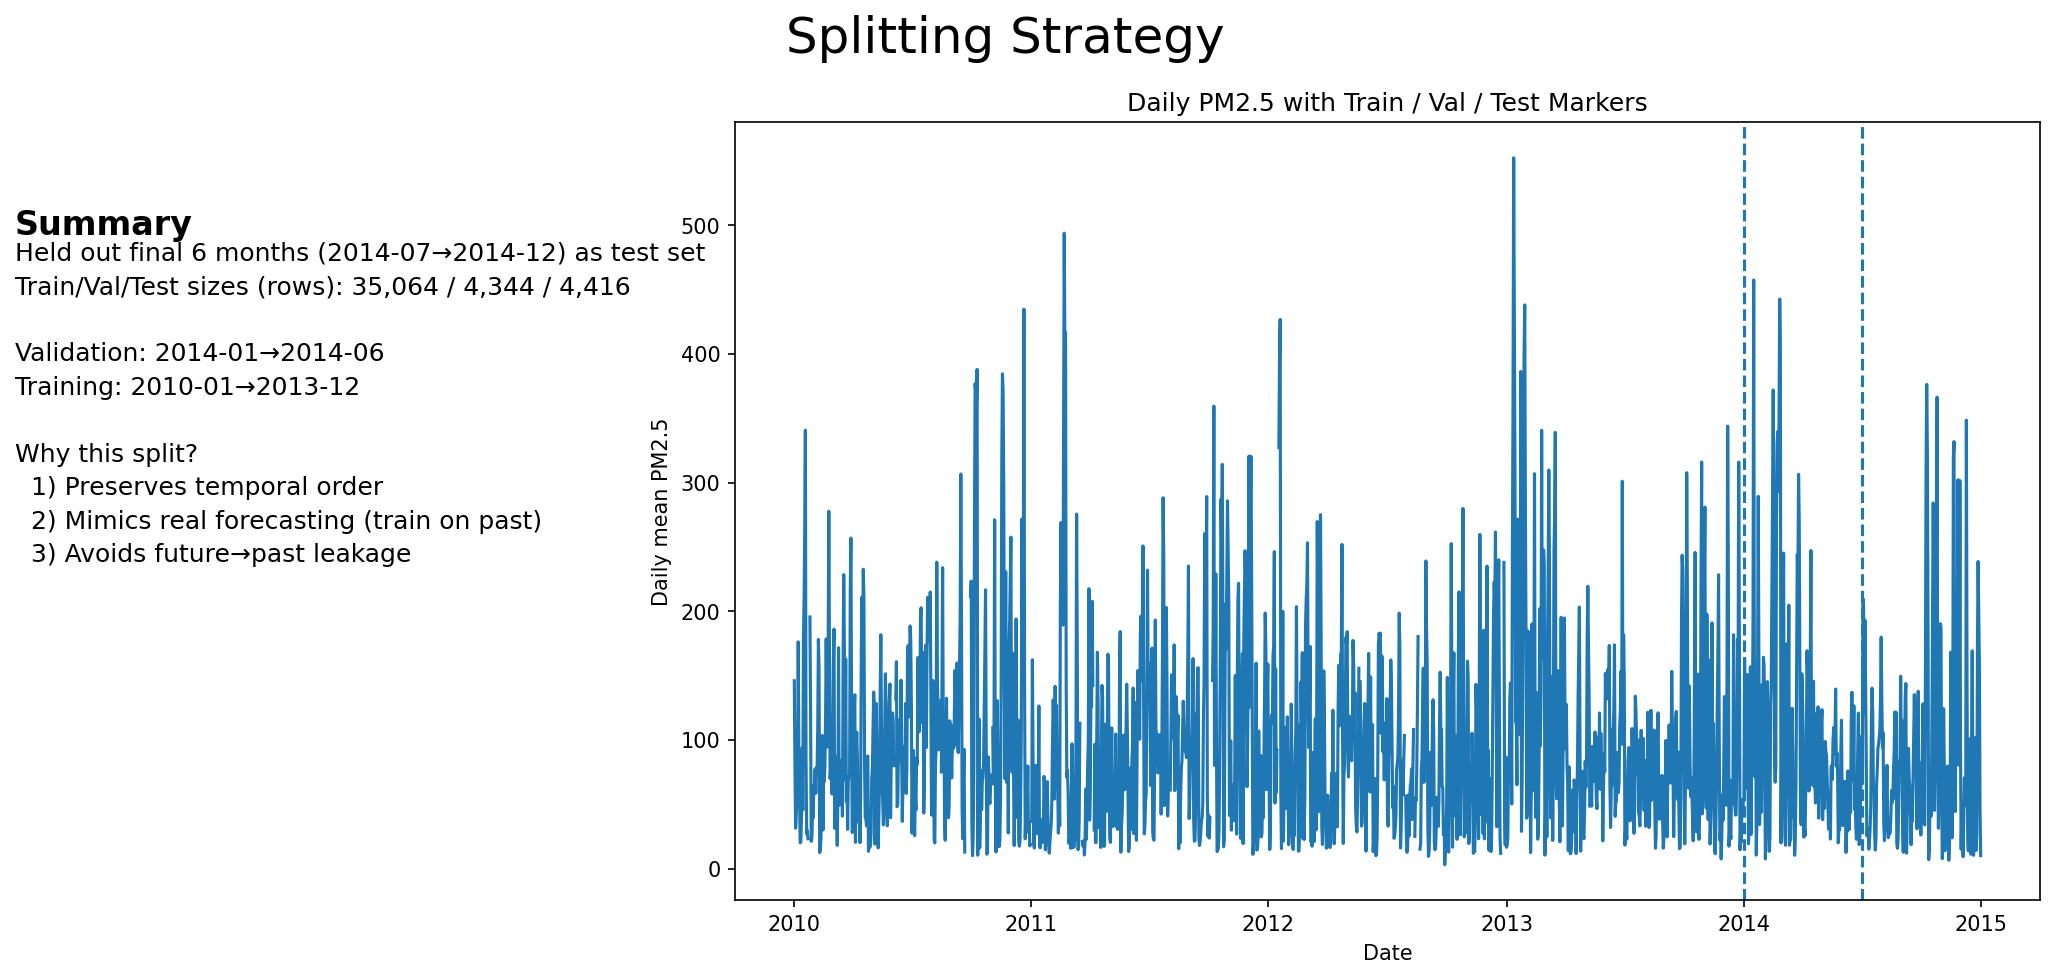

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

split_val = pd.to_datetime('2014-01-01')
split_test = pd.to_datetime('2014-07-01')

train = df[df['datetime'] < split_val]
val   = df[(df['datetime'] >= split_val) & (df['datetime'] < split_test)]
test  = df[df['datetime'] >= split_test]

daily = df.set_index('datetime')['pm2.5'].resample('D').mean()
fig = plt.figure(figsize=(15, 7.2), dpi=150) 
fig.suptitle('Splitting Strategy', fontsize=24, y=0.95)

ax = fig.add_axes([0.38, 0.13, 0.58, 0.72]) 
ax.plot(daily.index, daily.values)
ax.axvline(split_val, linestyle='--')
ax.axvline(split_test, linestyle='--')
ax.set_title('Daily PM2.5 with Train / Val / Test Markers', fontsize=12)
ax.set_xlabel('Date')
ax.set_ylabel('Daily mean PM2.5')


bullet_lines = [
    "Held out final 6 months (2014-07→2014-12) as test set",
    f"Train/Val/Test sizes (rows): {len(train):,} / {len(val):,} / {len(test):,}",
    "",
    "Validation: 2014-01→2014-06",
    "Training: 2010-01→2013-12",
    "",
    "Why this split?",
    "  1) Preserves temporal order",
    "  2) Mimics real forecasting (train on past)",
    "  3) Avoids future→past leakage"
]
text = "\n".join(bullet_lines)
fig.text(0.06, 0.77, "Summary", fontsize=16, fontweight='bold', ha='left', va='top')
fig.text(0.06, 0.74, text, fontsize=12, ha='left', va='top', linespacing=1.5)
plt.show()

time series  Kfold     timeseriessplit***

# Preprocessing

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

target_col = 'pm2.5'

df['hour'] = df['datetime'].dt.hour
df['hour_sin'] = np.sin(2*np.pi*df['hour']/24)
df['hour_cos'] = np.cos(2*np.pi*df['hour']/24)

df = df.sort_values('datetime').reset_index(drop=True)
df['pm2_1'] = df[target_col].shift(1)
df['pm2_24'] = df[target_col].shift(24)
df['pm2_24_mean'] = df[target_col].rolling(24).mean().shift(1)


missing_by_col = df.isna().mean().sort_values(ascending=False)
frac_rows_with_any_missing = df.isna().any(axis=1).mean()
num_features_total = df.shape[1]
num_features_with_any_missing = int((df.isna().sum() > 0).sum())
frac_features_with_missing = num_features_with_any_missing / num_features_total

print("Fraction of rows with ANY missing:", round(frac_rows_with_any_missing, 3))
print("Features with any missing:", f"{num_features_with_any_missing}/{num_features_total}",
      f"({frac_features_with_missing:.2%})")
print("Top missing columns:\n", missing_by_col.head(10))


candidate_features = [
    'DEWP','TEMP','PRES','Iws','Is','Ir',
    'hour_sin','hour_cos','pm2_1','pm2_24','pm2_24_mean'
]


lag_cols = ['pm2_1','pm2_24','pm2_24_mean']
train_clean = train.dropna(subset=[target_col] + lag_cols)
val_clean   = val.dropna(subset=[target_col] + lag_cols)
test_clean  = test.dropna(subset=[target_col] + lag_cols)

X_train, y_train = train_clean[candidate_features], train_clean[target_col]
X_val,   y_val   = val_clean[candidate_features],   val_clean[target_col]
X_test,  y_test  = test_clean[candidate_features],  test_clean[target_col]


num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),   
    ('scaler', StandardScaler())                     
])
preprocessor = ColumnTransformer([('num', num_transformer, candidate_features)])


Xtr = preprocessor.fit_transform(X_train)
Xva = preprocessor.transform(X_val)
Xte = preprocessor.transform(X_test)

print("\nFeature count BEFORE preprocessing:", len(candidate_features))
print("Feature count AFTER preprocessing:", Xtr.shape[1])
print("Rows AFTER drops (train/val/test):", Xtr.shape[0], Xva.shape[0], Xte.shape[0])


Fraction of rows with ANY missing: 0.142
Features with any missing: 4/19 (21.05%)
Top missing columns:
 pm2_24_mean    0.138896
pm2_24         0.047714
pm2_1          0.047189
pm2.5          0.047166
Iws            0.000000
hour_cos       0.000000
hour_sin       0.000000
datetime       0.000000
Ir             0.000000
Is             0.000000
dtype: float64

Feature count BEFORE preprocessing: 11
Feature count AFTER preprocessing: 11
Rows AFTER drops (train/val/test): 29646 3953 3997


### dont drop the missing data